In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns

# Обучение без учителя

![](../images/ml_models_types.png)

## Задача кластеризации

### Зачем проводится кластеризация

- Поиск новых признаков
- Определение структуры данных
- Альтернативный подход к классификации


### Алгоритм К средних

1. Определяем случайным образом центры
2. Определяем какие объекты каким классам принадлежат
3. Считаем для каждого класса среднее
4. Обновляем положение центра
5. Повторяем 2-4 до тех пор, пока изменение не будет очень маленьким

## Сгенерируем данные

Text(0.5, 1.0, 'Исходные данные')

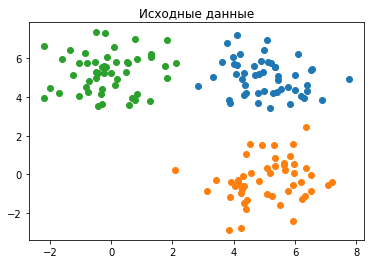

In [8]:
cluster_size = 50
n_clusters = 3
X = np.zeros((cluster_size * n_clusters, 2))

centers = [(5, 5), (5, 0), (0, 5)]

for iter_n, (x_center, y_center) in enumerate(centers):
    x = np.random.normal(x_center, 1, size=cluster_size)
    y = np.random.normal(y_center, 1, size=cluster_size)
    
    X[(iter_n) * cluster_size: (iter_n + 1) * cluster_size, 0] = x
    X[(iter_n) * cluster_size: (iter_n + 1) * cluster_size, 1] = y
    
    plt.scatter(x, y)
plt.title('Исходные данные')

Text(0.5, 1.0, 'Как модель видит исходные данные')

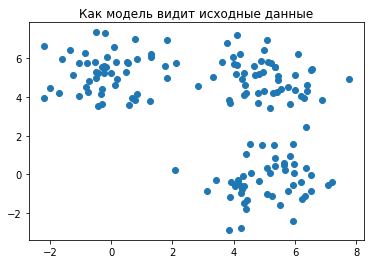

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Как модель видит исходные данные')

## Применим KMeans

In [10]:
model = KMeans(n_clusters=3)
model_labels = model.fit_predict(X)

## Нарисуем результат

Text(0.5, 1.0, 'Как модель определила кластеры')

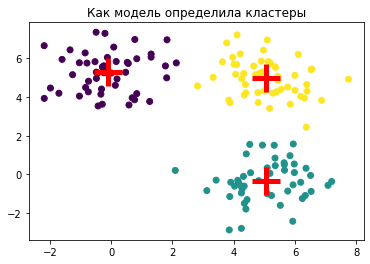

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=model_labels)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='+', s=800, linewidths=5, color='red')
plt.title('Как модель определила кластеры')

## Задача

Поработаем с датасетом о [вине](https://www.kaggle.com/harrywang/wine-dataset-for-clustering). Файл лежит в `../data/wine-clustering.csv`

Прочитать датасет, построить pairplot ( `sns.pairplot()` ), кластеризовать на 3 группы.

Объяснить смысл кластеров.

Какой признак выглядит наиболее значимым? Почему так произошло? Как все признаки учитывать в одинаковых пропорциях?

In [ ]:
# Ваш код здесь


### Что делать, если не знаем количество кластеров?

- Попробовать разное количество кластеров и посмотреть, какое количество подойдет лучше
- Посчитать среднее расстояние до центра кластера при разных $n$ (Elbow method)
- В качестве метрики можно взять не евклидову, а какую-то другую. Например, [Silhouette method](https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891#:~:text=Elbow%20Method%20is%20an%20empirical,represent%20it%20in%20a%20plot.)

In [96]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow method')

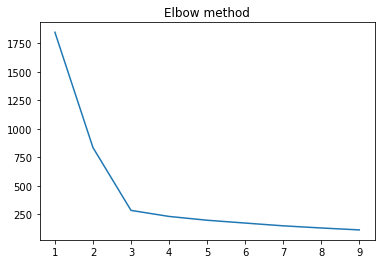

In [97]:
distances = [distance_by_n(X, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

В реальных задачах лучше использовать уже реализованный метод. [Например, из этой библиотеки](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

## Задача

Для датасета с вином найти оптимальное количество кластеров

In [ ]:
# Ваш код здесь


## Иерархическая кластеризация

Суть задачи - найти наиболее похожие друг на друга объекты/группы объектов.

На вход поступает выборка $X$ и количество желаемых кластеров $n$. По-умолчанию $n=2$.

На выходе получаем нужное количество кластеров и историю их формирования (сортируем объекты "по похожести")

![](../images/hierarchical.png)

Формально алгоритм можно записать так:

1. Изначально считаем, что каждая точка - отдельный кластер, таким образом разбивая все объекты на кластеры

2. Находим два наиболее похожих кластера, объединяем их в один

3. Продолжаем п.2 до тех пор, пока не получим нужное количество кластеров.

Критерием останова (п.3) помимо количества кластеров может быть расстояние между кластерами. Тогда алгоритм сам найдет оптимальное количество кластеров.

Также очень важен выбор функции "похожести". Это может быть обычное евклидово расстояние, а может быть какая-то специальная функция. Зачастую используют функцию Ward-а, которая минимизируем дисперсию, объединяя данные в кластеры.

Подробнее можно почитать [тут](https://jbhender.github.io/Stats506/F18/GP/Group10.html)


In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

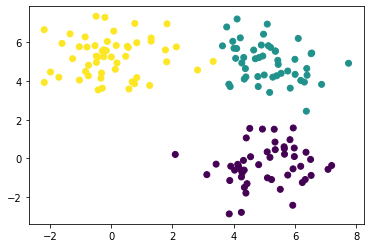

In [18]:
agg_result = AgglomerativeClustering(3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=agg_result)

## Визуализируем историю кластеризации

Обычно для этого используют дендрограммы. Дендрограмму можно построить при помощи кода ниже:

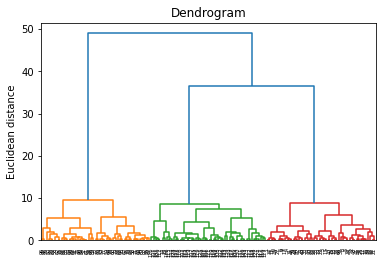

In [27]:
Z = linkage(X, method = 'ward')

#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Разберемся, что только что произошло.

Сначала мы провели кластеризацию методом `ward` при помощи функции `linkage`. Эта функция вернет матрицу размерности `(n-1, 4)`.

In [28]:
X.shape, Z.shape

((150, 2), (149, 4))

Посмотрим на значения матрицы `Z`, выведем первые 5 строк.

В каждой строке записаны номера кластеров, которые объединяются в один, в первых двух колонках. Если сейчас мы находимся в `i` строке, то номер нового кластера будет `n+i`. Например, в первой строке объединяются кластеры 1 и 36 в кластер 150.

В третьей колонке записано расстояние между кластерами. Между кластерами 1 и 36 расстояние равно 0.023.

В четвертой колонке записано количество исходных элементов, образовавшихся в кластер.

По этим данным метод `dendrogram` умеет строить дендрограммы.

In [33]:
np.set_printoptions(suppress=True)
Z[:5]

array([[  1.   ,  36.   ,   0.023,   2.   ],
       [ 10.   ,  21.   ,   0.04 ,   2.   ],
       [114.   , 129.   ,   0.064,   2.   ],
       [120.   , 143.   ,   0.065,   2.   ],
       [103.   , 135.   ,   0.075,   2.   ]])

## Задача

Применить иерархическую кластеризацию к датасету с вином. Визуализировать результат.

In [ ]:
# Ваш код здесь


# [Алгоритм DBSCAN](https://habr.com/ru/post/322034/)

Этот алгоритм считается одним из самых продвинутых алгоритмов кластеризации, проверенный временем.

Он позволяет находить кластеры любого размера и формы, причем сам определяет количество кластеров и автоматически находит выбросы.

У алгоритма есть два параметра, которые необходимо подбирать вручную - `eps` и `min_samples`. Чтобы понять за что они отвечают, нужно разобраться как работает алгоритм.

Изначально алгоритм выбирает случайную точку и ищет ближайших соседей в радиусе `eps`. Если соседей меньше, чем `min_samples`, то перед нами либо граница кластера, либо выброс.

Если соседей больше или равно `min_samples`, то мы помечаем точку как принадлежащую кластеру и переходим к следующей.

Если соседом точки из кластера оказалась точка, которую мы потенциально записали в выбросы, то эта точка становится границей.

Меняя параметры eps и min_samples можно довольно значительно изменить кластеризацию, поэтому нужно очень внимательно отнестить к их выбору

In [35]:
from sklearn.cluster import DBSCAN

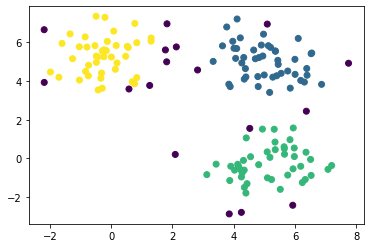

In [54]:
res = DBSCAN(eps=1, min_samples=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=res)

## Задача

Выбирая различные параметры для алгоритма `DBSCAN`, добиться:

- разбиения на 4 кластера
- разбиения на 1 кластер
- разбиения, ближайшего к исходному

## Задача

Применить алгоритм `DBSCAN` к датасету с вином.

## [Какие еще есть алгоритмы кластеризации](https://scikit-learn.org/stable/modules/clustering.html)

![](../images/clustering-methods.png)

## Задача понижения размерности

### Почему возникает такая задача?

- Хотим ускорить расчеты
- Можем визуализировать информацию максимум в трехмерном пространстве

### Решение задачи

В некоторых задачах признаков очень много и мы хотим получить как можно меньше размерность данных, не потеряв информацию. 

Один из методов - PCA (Principal Component Analysis, метод главных компонент). Он проецирует данные в пространство меньшей размерности, максимизирую дисперсию по каждой оси.

![](../images/pca.png)

В нашем игрушечном датасете всего две оси, поэтому ничего особо не поменяется.

Text(0.5, 1.0, 'Исходный датасет')

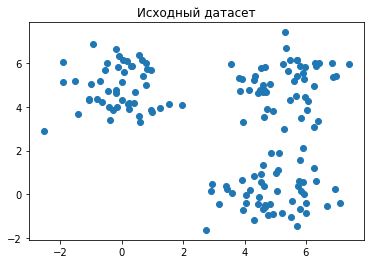

In [32]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Исходный датасет')

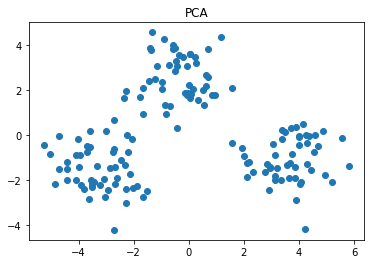

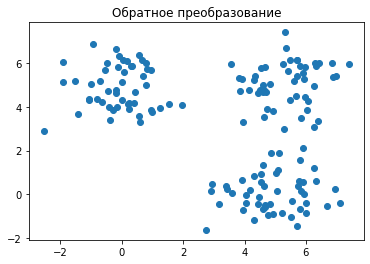

In [31]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(X)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1])

Можно посмотреть отношение объясненной дисперсии к необъясненной

In [42]:
pca.explained_variance_ratio_

array([0.6715438, 0.3284562])

### Недостатки алгоритма

- Можем потерять возможность разделять выборки
- Можем потерять часть информации
- Полученные оси сложно интерпретировать

![](../images/pca-bad.png)

## Задача

Спроецировать кластеризацию данных о вине в двумерное пространство, цветом отметить принадлежность к кластерам.

In [ ]:
# Ваш код здесь


## Задача* + домашняя работа

Поработаем с датасетом о [пользователях кредитных карт](https://www.kaggle.com/arjunbhasin2013/ccdata). 

Данные лежат в `../data/credit_card.csv`. 

### Easy

Нужно посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя `sns.pairplot`). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз".

### Normal

Определить количество кластеров при помощи метода Elbow.

Вывести график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`. Видны ли какие-то закономерности?

### Hard

Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

### Hard+

Провести иерархическую кластеризацию, проинтерпретировать.

### Hard++

Провести кластеризацию при помощи `DBSCAN`, сравнить результаты с полученными ранее.

In [ ]:
# Ваш код здесь


Очень крутое исследование по этому датасету [тут](https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset)

## Полезные ссылки

- [Цикл статей о алгоритмах кластеризации](https://habr.com/ru/post/321216/)
- [Про нечеткую кластеризацию](https://en.wikipedia.org/wiki/Fuzzy_clustering)
- [Подробнее про метод главных компонент](https://habr.com/ru/post/304214/)
- [Как подобрать платье с помощью метода главных компонент](https://habr.com/ru/company/io/blog/265089/)